In [1]:
from alphabet import alphabet
from hopfield import Hopfield
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

plt.rcParams.update({'font.size': 20})
plt.rc('figure', figsize=(10, 10))
plt.rc('figure', facecolor=(1,1,1,1))

rng = np.random.default_rng(1)

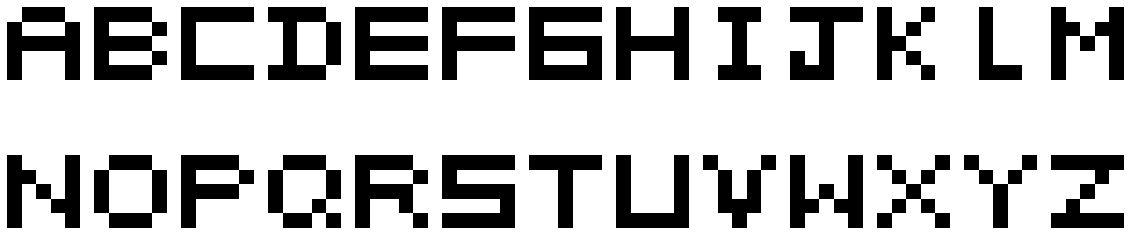

In [2]:
plt.figure("alphabet", figsize=(20,5))

for idx, value in enumerate(alphabet.values()):
    plt.subplot(2, 13, idx+1)
    plt.imshow(1-np.array(value, dtype=np.float32), cmap='gray')
    plt.axis('off')

In [3]:
dim = len(alphabet.values())
distances = np.zeros((dim, dim))
for i, value1 in enumerate(alphabet.values()):
    for j, value2 in enumerate(alphabet.values()):
        l1 = np.array(value1).ravel()
        l2 = np.array(value2).ravel()
        distance = round(
            np.dot(l1, l2)/np.linalg.norm(l1)/np.linalg.norm(l2), 2)
        distances[i, j] = distance

In [4]:
groups = list(itertools.combinations(range(len(alphabet)),r=4))

scores = []

for g in groups:
    score = 0
    for i in g:
        for j in g:
            score += distances[i,j]
    score -= len(g) #resto la diagonal
    score /= 2 #divido por 2 por que es una matriz triangular
    score /= (len(g)**2 - len(g))/2 # cantidad de elementos en una matriz triangular
    scores.append(score)

data = list(zip(groups, scores))

data = sorted(data, key = lambda x: x[1])

chars = [np.array(list(alphabet.keys()))[list(d[0])] for d in data ]
scores =[d[1] for d in data ]

data2 = list(zip(chars, scores))

df = pd.DataFrame(data2, columns=["Combinación", "Promedio $cos(\theta)$"])

df.head(n=10)

,Combinación,Promedio $cos(\theta)$
0,"[H, I, L, X]",0.251667
1,"[A, K, L, Y]",0.263333
2,"[K, L, Q, Y]",0.263333
3,"[K, L, Q, X]",0.265000
4,"[K, L, O, X]",0.266667
5,"[I, O, V, X]",0.270000
6,"[K, L, W, Y]",0.270000
7,"[H, L, Q, Y]",0.270000
8,"[K, O, X, Y]",0.275000
9,"[L, O, T, X]",0.275000


In [5]:
def noise(pattern, p):
    noise = rng.random(patterns.shape[1])
    noise[noise >= p] = 1
    noise[noise < p] = -1
    return noise*pattern

def identify_pattern(patterns, pattern):
    for i,p in enumerate(patterns):
        if not (p-pattern).any():
            return i
    
    return -1



In [6]:
network = Hopfield()

patterns = np.array([ np.array(pattern).ravel() for pattern in alphabet.values()])

chars = chars[0]

idx = list(data[0][0])

patterns = patterns[idx]

patterns[patterns == 0] = -1


In [7]:
network.train(patterns)

In [8]:
fake_states = []
for i in range(2**10):
    idx = i%len(patterns)
    pattern = patterns[idx]
    noise_pattern = noise(pattern, 0.5)
    prediction = network.predict(noise_pattern)
    idx = identify_pattern(patterns, prediction)
    if idx == -1:
        fake_states.append(prediction)

fake_states, count = np.unique(fake_states, axis=0, return_counts=True)

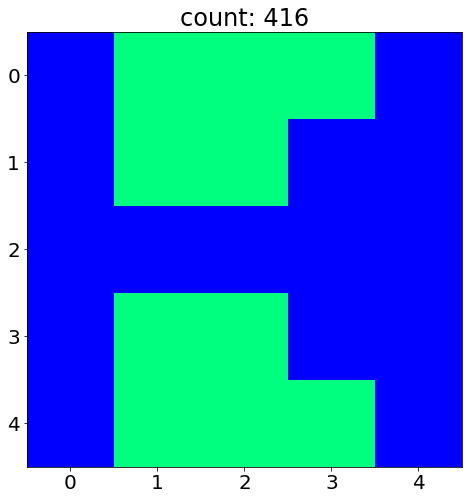

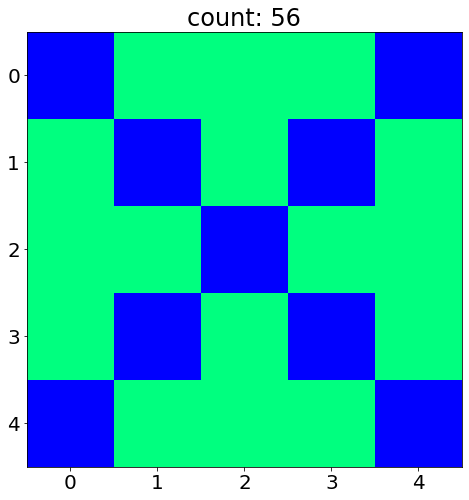

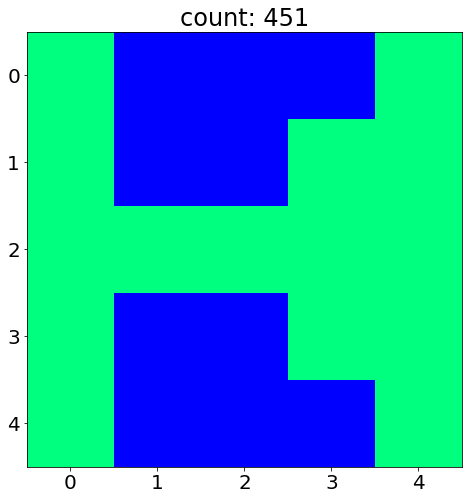

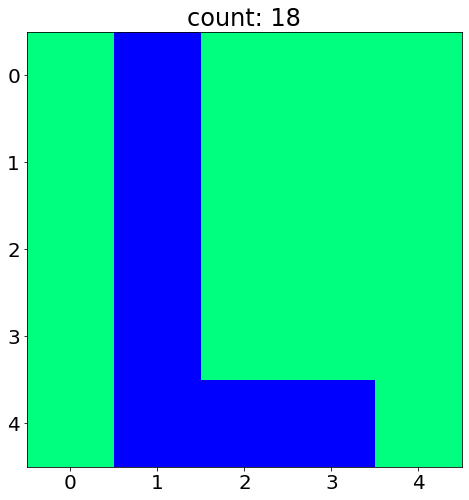

In [9]:
i=0
for state, c in zip(fake_states, count):
    if c < 5:
        continue

    plt.figure(i, figsize=(8,8))
    plt.title("count: " +  str(c))
    plt.imshow(state.reshape(5,5), cmap='winter')
    i+=1
    plt.show()